In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df = pd.read_csv('../../data/100_sentiment_analysis_sentences.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   label   100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df.text)

labels = df.label

print("Each of the %d label is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 100 label is represented by 61 features (TF-IDF score of unigrams and bigrams)


In [9]:
df_tfidf = pd.DataFrame(features.toarray(), columns=tfidf.get_feature_names(), index=df.index)
df_tfidf['label'] = df['label']
df_tfidf.head()
df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2030               100 non-null    float64
 1   2035               100 non-null    float64
 2   access             100 non-null    float64
 3   access reuters     100 non-null    float64
 4   agency             100 non-null    float64
 5   battery            100 non-null    float64
 6   black              100 non-null    float64
 7   brand              100 non-null    float64
 8   california         100 non-null    float64
 9   car                100 non-null    float64
 10  carb               100 non-null    float64
 11  com                100 non-null    float64
 12  com register       100 non-null    float64
 13  company            100 non-null    float64
 14  department         100 non-null    float64
 15  did                100 non-null    float64
 16  electric           100 non-

In [10]:
from pycaret.classification import setup
exp_mclf101 = setup(data = df_tfidf, target = 'label', session_id=123,use_gpu = True,log_experiment = True, experiment_name = 'sentiment_1')

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"NEGATIVE: 0, NEUTRAL: 1, POSITIVE: 2"
4,Original Data,"(100, 62)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:

from pycaret.classification import compare_models
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5786,0.7101,0.5778,0.5738,0.5650,0.3574,0.3655,0.0290
et,Extra Trees Classifier,0.5786,0.7143,0.5722,0.6162,0.5713,0.3592,0.3730,0.8440
ada,Ada Boost Classifier,0.5500,0.6725,0.5556,0.5741,0.5092,0.3294,0.3757,0.1590
dt,Decision Tree Classifier,0.5214,0.6442,0.5222,0.5429,0.4941,0.2857,0.3204,0.0230
svm,SVM - Linear Kernel,0.5214,0.0000,0.5000,0.4849,0.4828,0.2512,0.2627,0.0310
ridge,Ridge Classifier,0.5214,0.0000,0.5167,0.4881,0.4939,0.2669,0.2749,0.0160
rf,Random Forest Classifier,0.5190,0.6915,0.5167,0.5349,0.4976,0.2665,0.2853,0.8590
nb,Naive Bayes,0.4929,0.6799,0.5000,0.5211,0.4662,0.2451,0.2620,0.0180
gbc,Gradient Boosting Classifier,0.4619,0.6977,0.4556,0.4630,0.4358,0.1830,0.1968,0.3150
lda,Linear Discriminant Analysis,0.4500,0.5569,0.4444,0.4014,0.4116,0.1735,0.1734,0.0200


In [12]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from pycaret.classification import tune_model
tuned_lr = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8000,0.6111,0.5476,0.5429,0.3636,0.3750
1,0.5714,0.5143,0.6111,0.5476,0.5429,0.3636,0.3750
2,0.4286,0.5643,0.3889,0.3095,0.3592,0.0968,0.1083
3,0.7143,0.8786,0.7222,0.7619,0.7143,0.5758,0.5938
4,0.7143,0.7714,0.7222,0.7619,0.7143,0.5758,0.5938
5,0.7143,0.7357,0.6667,0.7500,0.7007,0.5484,0.5679
6,0.5714,0.8714,0.5556,0.6667,0.5905,0.3438,0.3550
7,0.7143,0.8714,0.7222,0.7619,0.7143,0.5758,0.5938
8,0.8571,0.8000,0.8889,0.9048,0.8571,0.7879,0.8125


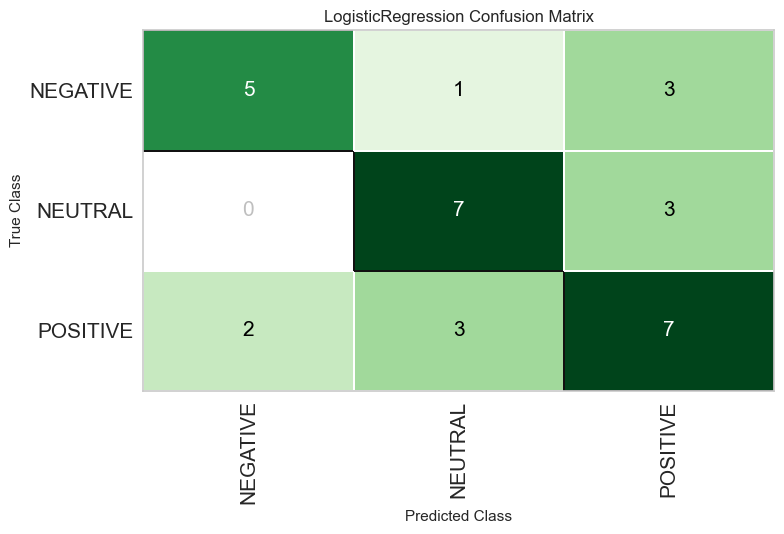

In [14]:
from pycaret.classification import plot_model
plot_model(tuned_lr, plot = 'confusion_matrix')

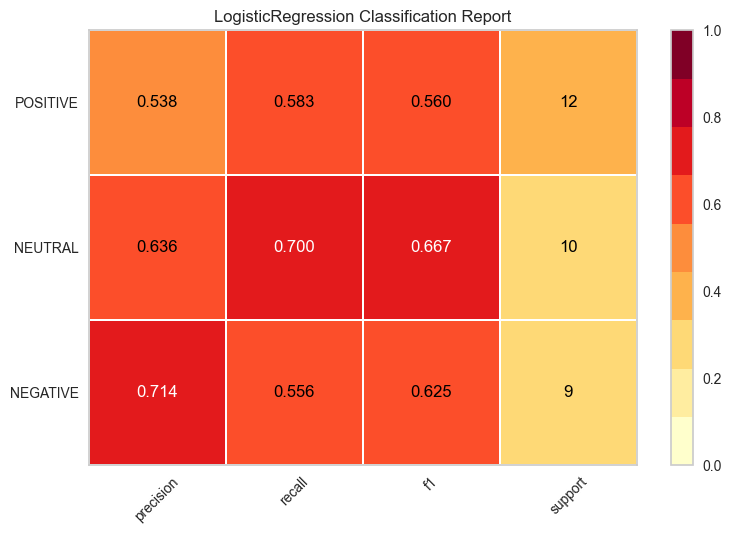

In [15]:
plot_model(tuned_lr, plot = 'class_report')

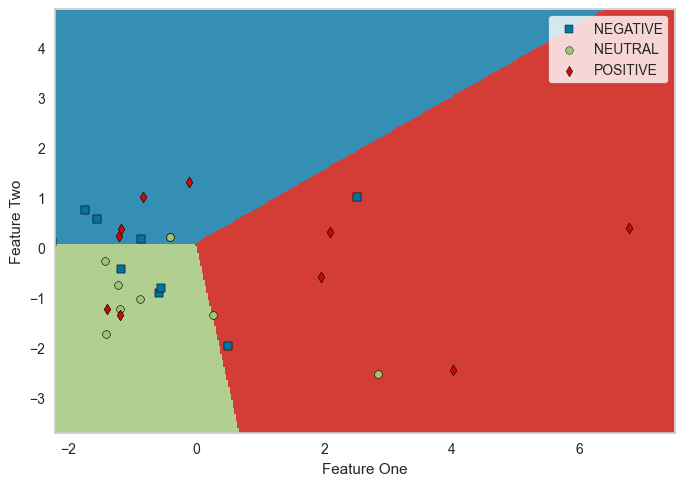

In [16]:
plot_model(tuned_lr, plot='boundary')

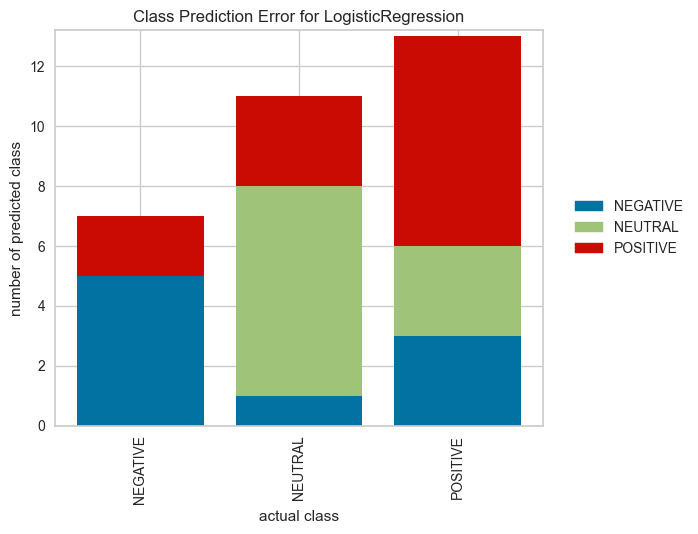

In [17]:
plot_model(tuned_lr, plot = 'error')

In [18]:
from pycaret.classification import evaluate_model
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
from pycaret.classification import finalize_model
final_lr = finalize_model(tuned_lr)

In [20]:
print(final_lr)

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
from pycaret.classification import predict_model
predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6452,0.7995,0.6444,0.6495,0.6462,0.4613,0.4620


,2030,2035,agency,battery,black,brand,california,car,carb,company,...,thursday,vehicle,vehicles,world,zero,musk_0.4628400206565857,seen_0.0,label,Label,Score
0,0.000000,0.000000,0.000000,0.489303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,NEGATIVE,NEUTRAL,0.3594
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.517208,0.000000,...,0.572898,0.00000,0.000000,0.000000,0.000000,0.0,1.0,POSITIVE,POSITIVE,0.3735
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263234,0.363891,0.363891,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0,NEUTRAL,POSITIVE,0.3385
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.283779,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0,POSITIVE,NEUTRAL,0.3494
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286526,0.000000,0.000000,0.000000,...,0.000000,0.39609,0.000000,0.000000,0.000000,0.0,1.0,POSITIVE,POSITIVE,0.3389
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,POSITIVE,NEUTRAL,0.3532
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.0,NEUTRAL,NEGATIVE,0.3456
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0,NEGATIVE,NEGATIVE,0.3579
8,0.000000,0.000000,0.627916,0.000000,0.000000,0.000000,0.425559,0.000000,0.000000,0.000000,...,0.651630,0.00000,0.000000,0.000000,0.000000,0.0,1.0,NEGATIVE,NEGATIVE,0.3473
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.0,NEGATIVE,NEGATIVE,0.3523


In [22]:
from pycaret.classification import save_model
import pickle
save_model(final_lr,'../models/pycaret')
pickle.dump(tfidf, open("../models/tfidf_vectorizer_pycaret.pkl", "wb"))

Transformation Pipeline and Model Successfully Saved


In [23]:
from pycaret.classification import load_model
saved_final_lr = load_model('../models/pycaret')

Transformation Pipeline and Model Successfully Loaded


In [25]:


test_input = pd.DataFrame(tfidf.transform(["test_input"]).toarray(), columns=tfidf.get_feature_names())
new_prediction = saved_final_lr.predict(test_input)
new_prediction
#new_prediction = predict_model(saved_final_knn, data=data_unseen)


array([1], dtype=int64)

In [40]:
# to start the MLFlow server from notebook:
! mlflow ui

'mlflow' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
### TF-IDF Custom ML Model